In [5]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [6]:
 !pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
instacart = "/content/drive/MyDrive/Colab Notebooks/Project 2 - Text Summarization/liputan6_data.tar.gz"

In [9]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=edaba4fa7077e25498ebb5667df2450c7ac448694fd978ad560e5ad36d50f1ba
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [10]:
import pandas as pd

In [11]:
import tarfile

tf = tarfile.open("/content/drive/MyDrive/Colab Notebooks/Project 2 - Text Summarization/liputan6_data.tar.gz")

In [12]:
tf.extractall()

In [13]:
import json

# Ganti 'path/to/your/file.json' dengan jalur lengkap ke file JSON Anda
file_path = '/content/liputan6_data/canonical/train/100000.json'

# Membuka file JSON dan membaca isinya
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

# Sekarang variabel 'data' berisi konten dari file JSON
# Anda dapat memanipulasi atau menggunakan data sesuai kebutuhan Anda.

In [14]:
print(data)

{'id': 100000, 'url': 'https://www.liputan6.com/news/read/100000/yudhoyono-berharap-masalah-kemiskinan-menjadi-bahasan-penting', 'clean_article': [['Liputan6', '.', 'com', ',', 'Jakarta', ':', 'Presiden', 'Susilo', 'Bambang', 'Yudhoyono', 'menekankan', 'bahwa', 'tantangan', 'terbesar', 'yang', 'dihadapi', 'bangsa-bangsa', 'Asia', 'dan', 'Afrika', 'saat', 'ini', 'adalah', 'masalah', 'kemiskinan', 'yang', 'sangat', 'buruk', '.'], ['Yudhoyono', 'berharap', 'masalah', 'ini', 'menjadi', 'pembahasan', 'penting', 'dalam', 'Konferensi', 'Tingkat', 'Tinggi', 'Asia-Afrika', '.'], ['Demikian', 'pidato', 'Yudhoyono', 'saat', 'membuka', 'KTT', 'Asia-Afrika', 'di', 'Jakarta', 'Convention', 'Centre', ',', 'Jakarta', ',', 'Jumat', '(', '22/4', ')', '[', 'baca', ':', 'Presiden', 'Yudhoyono', 'Resmi', 'Membuka', 'KAA', ']', '.'], ['Pada', 'awal', 'pidatonya', ',', 'Yudhoyono', 'para', 'peserta', 'untuk', 'mengheningkan', 'cipta', 'sejenak', 'bagi', 'korban', 'gempa', 'dan', 'Tsunami', 'di', 'Nanggroe', 

In [15]:
import os
import json

# Ganti 'path/to/your/folder' dengan jalur lengkap ke folder yang berisi file JSON Anda
folder_path = '/content/liputan6_data/canonical/train'

# List untuk menyimpan konten semua file JSON
all_json_data = []

# Loop melalui semua file dalam direktori
for filename in os.listdir(folder_path):
    # Pastikan file berupa file JSON
    if filename.endswith('.json'):
        # Buat jalur lengkap ke file
        file_path = os.path.join(folder_path, filename)
        # Buka file JSON dan baca isinya
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            # Tambahkan konten file JSON ke list all_json_data
            all_json_data.append(data)

# all_json_data sekarang berisi konten dari semua file JSON dalam folder
# Anda dapat memproses data ini sesuai kebutuhan Anda.

In [16]:
print(all_json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
# Membuat DataFrame dari data JSON
df_train = pd.DataFrame(all_json_data)

In [18]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membaca data dari file JSON
def read_json_file(file_path):
    try:
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            return data
    except Exception as e:
        print(f"Error while reading {file_path}: {str(e)}")
        return None

# Fungsi untuk membaca semua file JSON dalam folder
def read_json_files_in_folder(folder_path):
    all_json_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            data = read_json_file(file_path)
            if data is not None:
                all_json_data.append(data)
    return all_json_data

# Fungsi untuk menjalankan EDA pada DataFrame
def perform_eda(dataframe):
    # Menampilkan informasi umum tentang DataFrame
    print("Informasi Umum DataFrame:")
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif DataFrame:")
    print(dataframe.describe())

    # Menampilkan 5 baris pertama DataFrame
    print("\nLima Baris Pertama DataFrame:")
    print(dataframe.head())

# Menjalankan EDA pada DataFrame
perform_eda(df_train)

Informasi Umum DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193883 entries, 0 to 193882
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  193883 non-null  int64 
 1   url                 193883 non-null  object
 2   clean_article       193883 non-null  object
 3   clean_summary       193883 non-null  object
 4   extractive_summary  193883 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.4+ MB
None

Statistik Deskriptif DataFrame:
                  id
count  193883.000000
mean   168003.947381
std     78141.732151
min     26408.000000
25%    103116.500000
50%    171715.000000
75%    233933.500000
max    299999.000000

Lima Baris Pertama DataFrame:
       id                                                url  \
0  167730  https://www.liputan6.com/news/read/167730/gili...   
1  198857  https://www.liputan6.com/news/read/198857/sisw...   
2  101531  https://ww

In [19]:
df_train["clean_summary"].head()

0    [[Dalam, sepekan, terakhir, ,, ancaman, bom, k...
1    [[Disdik, Polewali, Mandar, ,, Sulbar, ,, mela...
2    [[Sejumlah, ruas, Tol, Cipularang, yang, ada, ...
3    [[Manajemen, PT, Certis, Cisco, ,, selaku, pen...
4    [[Luca, Toni, mulai, menghitung, hari, .], [Pe...
Name: clean_summary, dtype: object

In [20]:
  def histogram_eda(dataframe):
    # Visualisasi data
    # Contoh: Histogram dari kolom numerik
    numeric_columns = dataframe.select_dtypes(include=['int', 'float']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

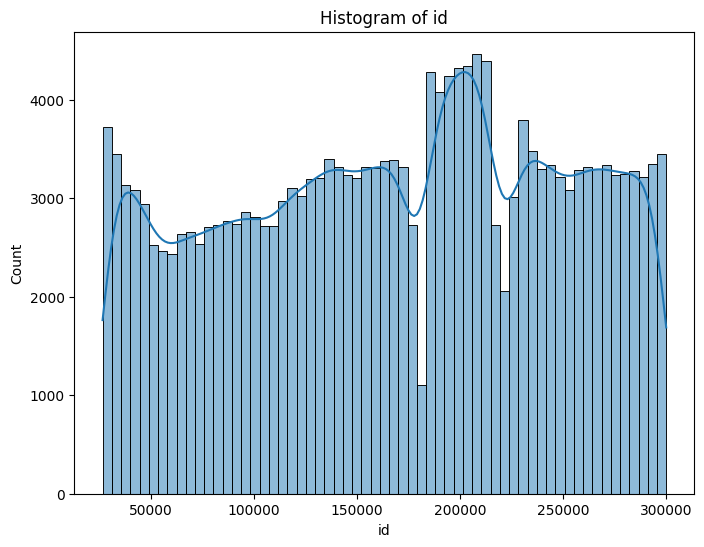

In [21]:
histogram_eda(df_train)

In [22]:
from transformers import pipeline

In [23]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [39]:
ARTICLE ="""
    Bahasa verbal merupakan suatu bahasa yang dituangkan dalam bentuk ucapan atau tulisan. Sementara itu, menurut Mulyana (2005) bahasa verbal merupakan bahasa yang penggunaannya menggunakan simbol-simbol agar dipahami oleh suatu komunitas.
    Apabila terjadi permasalahan dalam perkembangan bahasa verbal maka bisa jadi individu mengalami gangguan-gangguan pada perkembangan bahasa verbal.
    Pada artikel kali ini kita akan mengulas lebih jauh tentang gangguan, tanda-tanda gangguan, faktor yang berpengaruh dan juga terapi untuk memaksimalkan perkembangan bahasa verbal.
    """

In [40]:
summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)

[{'summary_text': ' Bahasa verbal merupakakan bahasa yang penggunaannya menggunakan simbol-simbol agar dipahami oleh suatu komunitas . Apabila terjadi permasalahan dalam perkembangan bahas verbal dalam bentuk ucapan atau tulisan .'}]

In [42]:
!pip install rouge

In [43]:
from rouge import Rouge

# Fungsi untuk menghitung ROUGE-1, ROUGE-2, dan ROUGE-L
def compute_rouge(target_summary, predicted_summary):
    rouge = Rouge()
    scores = rouge.get_scores(target_summary, predicted_summary, avg=True)
    rouge_1 = scores['rouge-1']['f']
    rouge_2 = scores['rouge-2']['f']
    rouge_l = scores['rouge-l']['f']
    return rouge_1, rouge_2, rouge_l

# Contoh beberapa target summary dan predicted summary
target_summaries = [
    """
    Junk Food disebut makanan instan atau makanan cepat saji yang kini telah berkembang pesat di persaingan perusahaan makanan di Indonesia. Makanan cepat saji dinilai sebagian orang lebih efektif terhadap waktu dan mudah ditemukan. Tak hanya itu saja, makanan cepat saji memiliki cita rasa yang lezat, ditambah lagi harganya yang terjangkau.
    Makanan cepat saji sudah lama mengundang kontroversi di negara kita karena terungkapnya beberapa dampak buruk yang dimiliki. Dampak buruk itu disebabkan oleh kandungan zat-zat berbahaya di dalam makanan instan, seperti lilin yang ada pada mie instan. Tak berhenti di situ, nyatanya di dalam makanan cepat saji terkandung bahan pengawet dan penyedap yang kini disebut micin.
    Fenomena kata "micin" kini mendadak kerap digunakan para remaja hingga dewasa bila seseorang mengalami hal-hal yang kurang normal. Maksud dari hal kurang normal itu seperti seseorang yang telat berpikir, lama menjawab bila diajak bicara, dan lain sebagainya. Tak bisa dimungkiri, makanan cepat saji memang mengandung zat berbahaya seperti yang telah diungkapkan di atas.
    Sejumlah penelitian telah membuktikan bahwa keseringan mengonsumsi makanan cepat saji saja memang tidak berdampak secara langsung ke tubuh. Namun, makanan-makanan cepat saji yang dikonsumsi akan tertimbun di dalam tubuh yang kemudian menjadi penyebab penyakit mematikan seperti kanker. Tak hanya kanker, penyakit berbahaya juga mengintai, misalnya stroke, usus buntu, dan penyakit ginjal.
    Maka bila Anda termasuk ke dalam orang yang hobi mengkonsumsi makanan cepat saja, kurangilah hal itu dan mulai sayangi tubuh serta diri Anda sendiri. Perlu diketahui bahwa satu di antara kandungan di dalam makanan instan yaitu lilin sulit dicerna tubuh. Lilin itu menghancurkan prinsip kerja sistem pencernaan tubuh sehingga makanan yang mengandung lilin akan dicerna dengan waktu minimal dua hari.
    """,
    """Penelitian ini bertujuan untuk mengetahui kesesuaian lahan untuk berbagai peruntukan pada kawasan pembangunan pelabuhan niaga di wilayah pantai Kaliwungu waktu sekarang dan perubahan pola pemanfaatan lahan akibat pembangunan pelabuhan niaga di pantai Kaliwungu Kabupaten Kendal.
    Untuk mendapatkan sampel yang mewakili populasi dilakukan dengan metode purposive sampling dengan jumlah responden sebanyak 160 orang.
    Pengumpulan data primer didapatkan dengan cara observasi, tanya jawab dengan instansi terkait dan pengisian kuesener yang dilakukan oleh masyarakat sebagai ‘stakeholder’.
    Data sekunder didapatkan dari instansi yang berkaitan dengan topik tulisan.
    Data dianalisis dengan dibagi menjadi analisis keruangan dan kesesuaian lahan, analisis perubahan parameter lingkungan, analisis sosial.
    Hasil penelitian menunjukkan bahwa dari segi kesesuaian lahan pada kawasan pembangunan pelabuhan niaga termasuk kategori sesuai untuk peruntukan pembangunan pelabuhan, budidaya tambak, industri, wisata dan kategori agak sesuai untuk peruntukan pertanian, pemukiman.
    Perubahan pola pemanfaatan berupa perubahan tata ruang yang telah ada menjadi tata ruang baru, sehingga terjadi perubahan pemanfaatan lahan berupa sawah dan tambak untuk pembangunan lokasi pelabuhan dan sarana pendukung pelabuhan seluas 32 ha dan sarana penunjang pengairan untuk kegiatan tambak.
    """,
    """Bahasa verbal merupakan suatu bahasa yang dituangkan dalam bentuk ucapan atau tulisan. Sementara itu, menurut Mulyana (2005) bahasa verbal merupakan bahasa yang penggunaannya menggunakan simbol-simbol agar dipahami oleh suatu komunitas.
    Apabila terjadi permasalahan dalam perkembangan bahasa verbal maka bisa jadi individu mengalami gangguan-gangguan pada perkembangan bahasa verbal.
    Pada artikel kali ini kita akan mengulas lebih jauh tentang gangguan, tanda-tanda gangguan, faktor yang berpengaruh dan juga terapi untuk memaksimalkan perkembangan bahasa verbal.
    """
    ]

predicted_summaries = [
    "Makanan cepat saji dinilai sebagian orang lebih efektif terhadap waktu dan mudah ditemukan . Maksud dari hal kurang normal itu seperti seseorang yang telat berpikir, lama menjawab bila diajak bicara, dan lain sebagainya .",
    "Penelitian ini bertujuan untuk mengetahui kesesuaian lahan untuk berbagai peruntukan . Data sekunder didapatkan dari instansi yang berkaitan dengan topik tulisan . Data dianalisis dengan dibagi menjadi analisis .",
    "Bahasa verbal merupakakan bahasa yang penggunaannya menggunakan simbol-simbol agar dipahami oleh suatu komunitas . Apabila terjadi permasalahan dalam perkembangan bahas verbal dalam bentuk ucapan atau tulisan ."
]

# Evaluasi setiap pasangan target dan prediksi menggunakan ROUGE
for target, predicted in zip(target_summaries, predicted_summaries):
    rouge_1, rouge_2, rouge_l = compute_rouge(target, predicted)
    print("Target:", target)
    print("Predicted:", predicted)
    print("ROUGE-1:", rouge_1)
    print("ROUGE-2:", rouge_2)
    print("ROUGE-L:", rouge_l)
    print("\n")


Target: 
    Junk Food disebut makanan instan atau makanan cepat saji yang kini telah berkembang pesat di persaingan perusahaan makanan di Indonesia. Makanan cepat saji dinilai sebagian orang lebih efektif terhadap waktu dan mudah ditemukan. Tak hanya itu saja, makanan cepat saji memiliki cita rasa yang lezat, ditambah lagi harganya yang terjangkau.
    Makanan cepat saji sudah lama mengundang kontroversi di negara kita karena terungkapnya beberapa dampak buruk yang dimiliki. Dampak buruk itu disebabkan oleh kandungan zat-zat berbahaya di dalam makanan instan, seperti lilin yang ada pada mie instan. Tak berhenti di situ, nyatanya di dalam makanan cepat saji terkandung bahan pengawet dan penyedap yang kini disebut micin.
    Fenomena kata "micin" kini mendadak kerap digunakan para remaja hingga dewasa bila seseorang mengalami hal-hal yang kurang normal. Maksud dari hal kurang normal itu seperti seseorang yang telat berpikir, lama menjawab bila diajak bicara, dan lain sebagainya. Tak bis